In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
from  sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Embedding,LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import  LabelEncoder
from joblib import dump
import re
from bs4 import BeautifulSoup
import string
from nltk.corpus import stopwords




In [4]:
data = pd.read_csv('../DataSet/Twitter_Data.csv')
data.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [2]:
import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ravia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ravia\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ravia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ravia\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ravia\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [7]:
# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# 1. Handle missing values - Drop rows with any null values
cleaned_data = data.dropna().reset_index(drop=True)

# 2. Remove duplicates based on 'textID' or 'text'
cleaned_data = cleaned_data.drop_duplicates(subset=['textID', 'text']).reset_index(drop=True)

# 3. Text Cleaning Function
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove special characters and numbers
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\d', '', text)
    # Tokenization and remove stopwords
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatization
    lemmatized = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(lemmatized)

# Apply text cleaning to both 'text' and 'selected_text'
cleaned_data['text'] = cleaned_data['text'].apply(clean_text)
cleaned_data['selected_text'] = cleaned_data['selected_text'].apply(clean_text)

# 4. Sentiment Encoding
sentiment_mapping = {'positive': 2, 'neutral': 1, 'negative': 0}
cleaned_data['sentiment_encoded'] = cleaned_data['sentiment'].map(sentiment_mapping)

# Review the cleaned data
cleaned_data_head = cleaned_data.head()
cleaned_data_info = cleaned_data.info()

cleaned_data_head, cleaned_data_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27480 entries, 0 to 27479
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   textID             27480 non-null  object
 1   text               27480 non-null  object
 2   selected_text      27480 non-null  object
 3   sentiment          27480 non-null  object
 4   sentiment_encoded  27480 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.0+ MB


(       textID                            text    selected_text sentiment  \
 0  cb774db0d1                 responded going  responded going   neutral   
 1  549e992a42         sooo sad miss san diego         sooo sad  negative   
 2  088c60f138                    bos bullying         bullying  negative   
 3  9642c003ef           interview leave alone      leave alone  negative   
 4  358bd9e861  son put release already bought              son  negative   
 
    sentiment_encoded  
 0                  1  
 1                  0  
 2                  0  
 3                  0  
 4                  0  ,
 None)

In [9]:
cleaned_data['sentiment_encoded'].head()

0    1
1    0
2    0
3    0
4    0
Name: sentiment_encoded, dtype: int64

In [10]:
cleaned_data['sentiment'].head()

0     neutral
1    negative
2    negative
3    negative
4    negative
Name: sentiment, dtype: object

In [11]:
cleaned_data['sentiment'].value_counts()

sentiment
neutral     11117
positive     8582
negative     7781
Name: count, dtype: int64

C:\Users\ravia\AppData\Local\Temp\ipykernel_21664\2814429422.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=cleaned_data, palette='muted')


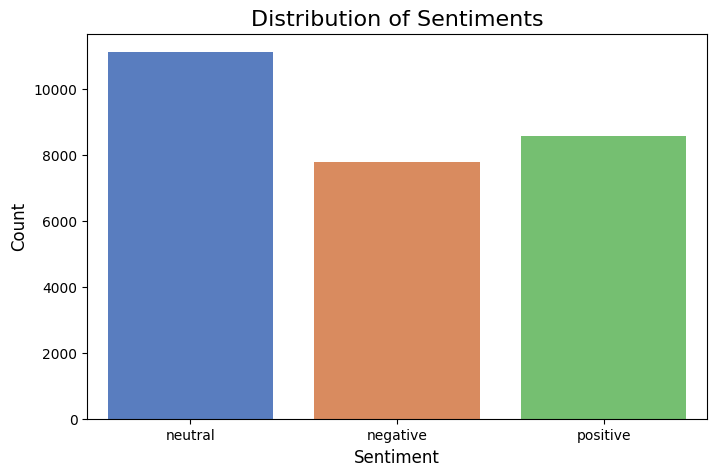

In [12]:
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment', data=cleaned_data, palette='muted')

# Add title and labels
plt.title('Distribution of Sentiments', fontsize=16)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Display the plot
plt.show()

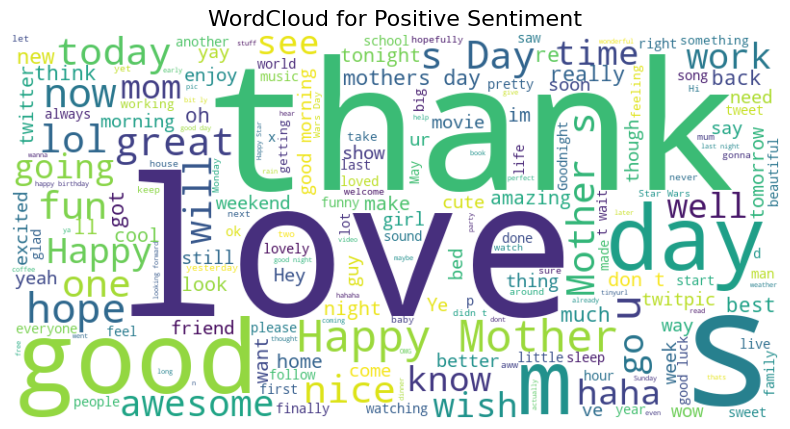

In [ ]:
    from wordcloud import WordCloud

    positive_text = " ".join(data[data['sentiment'] == 'positive']['text'])
    wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

    # Display the WordCloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_positive, interpolation='bilinear')
    plt.axis('off')
    plt.title('WordCloud for Positive Sentiment', fontsize=16)
    plt.show()

In [ ]:
clea

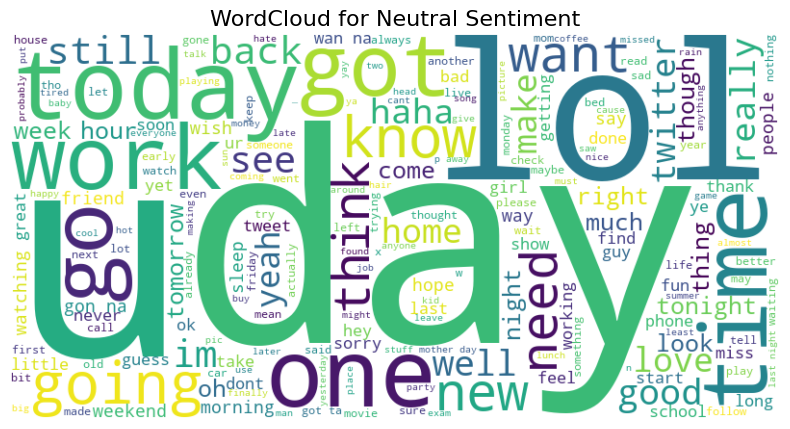

In [16]:
neutral_text = " ".join(cleaned_data[cleaned_data['sentiment'] == 'neutral']['text'])
wordcloud_neutral = WordCloud(width=800, height=400, background_color='white').generate(neutral_text)

# Display the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Neutral Sentiment', fontsize=16)
plt.show()

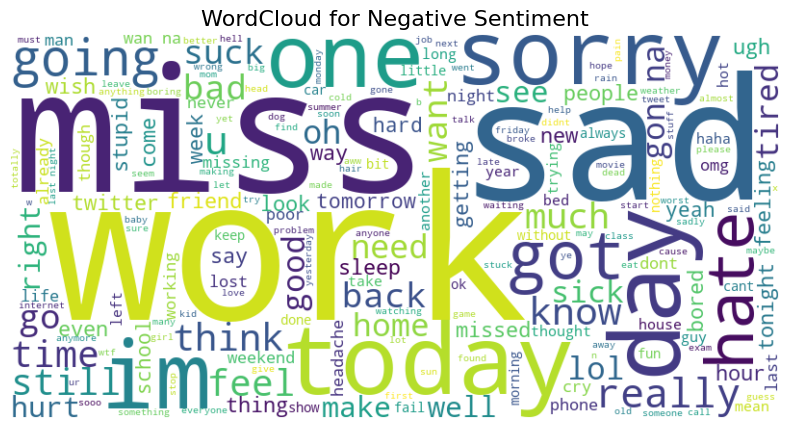

In [17]:
negative_text = " ".join(cleaned_data[cleaned_data['sentiment'] == 'negative']['text'])
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Display the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Negative Sentiment', fontsize=16)
plt.show()

In [45]:
texts = cleaned_data['text'].astype(str).tolist()  # Ensure all texts are string

# Step 1: Initialize and fit the Tokenizer
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")  # Handle unknown words with <OOV>
tokenizer.fit_on_texts(texts)

# Step 2: Convert texts to sequences
text_sequences = tokenizer.texts_to_sequences(texts)

# Step 3: Pad sequences to ensure uniform length
padded_sequences = pad_sequences(text_sequences, maxlen=100, padding='post', truncating='post')

# Step 4: Review tokenized output
print("Sample Tokenized Sequence:", text_sequences[0])
print("Padded Sequence:", padded_sequences[0])

# Optional: View the word index created by the tokenizer
print("Word Index:", tokenizer.word_index)


Sample Tokenized Sequence: [9134, 12]
Padded Sequence: [9134   12    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]
Word Index: {'<OOV>': 1, 'day': 2, 'good': 3, 'get': 4, 'like': 5, 'go': 6, 'got': 7, 'u': 8, 'love': 9, 'work': 10, 'today': 11, 'going': 12, 'time': 13, 'one': 14, 'lol': 15, 'happy': 16, 'know': 17, 'back': 18, 'really': 19, 'im': 20, 'want': 21, 'see': 22, 'night': 23, 'mother': 24, 'think': 25, 'new': 26, 'home': 27, 'well': 28, 'na': 29, 'still': 30, 'oh': 31, 'thanks': 32, 'much': 33, 'need': 34, 'miss': 35, 'hope': 36, 'grea

In [46]:

x_train, x_test, y_train, y_test = train_test_split(cleaned_data['text'], cleaned_data['sentiment_encoded'], test_size=0.2, random_state=42)

In [55]:
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(x_train)  # Fit only on training data

# Step 3: Convert texts to sequences
x_train_seq = tokenizer.texts_to_sequences(x_train)
x_test_seq = tokenizer.texts_to_sequences(x_test)

# Step 4: Pad sequences to ensure uniform input length
max_len = 100  # Maximum length of sequences
x_train_pad = pad_sequences(x_train_seq, maxlen=max_len, padding='post', truncating='post')
x_test_pad = pad_sequences(x_test_seq, maxlen=max_len, padding='post', truncating='post')

# Step 5: Review the tokenized and padded data
print("Sample Padded Training Sequence:", x_train_pad[0])
print("Sample Padded Test Sequence:", x_test_pad[0])
print("Vocabulary Size:", len(tokenizer.word_index) + 1)  # Add 1 for <OOV>

# Optional: Print the shape of the datasets
print("x_train_pad shape:", x_train_pad.shape)
print("x_test_pad shape:", x_test_pad.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Sample Padded Training Sequence: [ 30 918   1 632  31   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]
Sample Padded Test Sequence: [260 244   1 243   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]
Vocabulary Size: 19099
x_train_pad shape: (21984, 100)
x_test_pad shape: (5496, 100)
y_train shape: (21984,)
y_test shape: (

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Bidirectional

vocab_size = 5000  # Same as the num_words in Tokenizer
embedding_dim = 64   # Dimension of word embeddings
max_len = 100        # Length of padded sequences
batch_size = 32      # Training batch size
epochs = 10          # Number of training epochs

# Step 2: Build the Model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len),
    Bidirectional(LSTM(64, return_sequences=True)),  # Bidirectional LSTM for better context capture
    Dropout(0.5),  # Dropout to prevent overfitting
    LSTM(32),  # Another LSTM layer
    Dense(32, activation='relu'),  # Dense layer with ReLU activation
    Dropout(0.5),  # Dropout
    Dense(3, activation='softmax')  # Final layer with softmax activation for 3 classes
])

# Step 3: Compile the Model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Display the model summary
model.summary()

# Step 4: Set Early Stopping (optional, to prevent overfitting)
early_stopping = EarlyStopping(
    monitor='val_loss', patience=3, restore_best_weights=True
)



d:\Tweeter Sentiments\venv\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_12 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_15 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [49]:
history = model.fit(
    x_train_pad, np.array(y_train), 
    validation_data=(x_test_pad, np.array(y_test)),
    batch_size=batch_size, 
    epochs=epochs, 
    callbacks=[early_stopping]
)

# Step 6: Evaluate the Model on Test Data
test_loss, test_accuracy = model.evaluate(x_test_pad, np.array(y_test))
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

Epoch 1/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 56s 70ms/step - accuracy: 0.3995 - loss: 1.0900 - val_accuracy: 0.4068 - val_loss: 1.0870
Epoch 2/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 51s 74ms/step - accuracy: 0.3972 - loss: 1.0890 - val_accuracy: 0.4068 - val_loss: 1.0865
Epoch 3/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 46s 66ms/step - accuracy: 0.4036 - loss: 1.0878 - val_accuracy: 0.4068 - val_loss: 1.0867
Epoch 4/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 46s 67ms/step - accuracy: 0.4069 - loss: 1.0864 - val_accuracy: 0.4068 - val_loss: 1.0867
Epoch 5/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 45s 66ms/step - accuracy: 0.4021 - loss: 1.0878 - val_accuracy: 0.4068 - val_loss: 1.0867
172/172 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.4056 - loss: 1.0862
Test Loss: 1.0865, Test Accuracy: 0.4068


In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Hyperparameters
vocab_size = 5000  # Vocabulary size for embedding layer
embedding_dim = 100  # Embedding vector size
max_len = 100  # Input sequence length
batch_size = 32  # Batch size for training
epochs = 10  # Increased number of epochs for more training

# Build the Sequential Model with Bidirectional GRU
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len),
    Dropout(0.3),  # Lower dropout to retain more information
    Bidirectional(GRU(64, return_sequences=True)),  # Increased number of units
    Dropout(0.3),  # Lower dropout to retain more information
    Bidirectional(GRU(32)),  # Another GRU layer
    Dense(32, activation='relu'),  # Fully connected layer
    Dropout(0.5),  # Keep higher dropout for final dense layer
    Dense(3, activation='softmax')  # Output layer for 3 sentiment classes
])

# Compile the Model
model.compile(
    optimizer='adam',  # You can also try other optimizers
    loss='sparse_categorical_crossentropy',  # Use sparse loss for integer labels
    metrics=['accuracy']
)

# Display the Model Summary
model.summary()

# Set Early Stopping to prevent overfitting
# early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the Model
history = model.fit(
    x_train_pad, y_train,
    validation_data=(x_test_pad, y_test),
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[early_stopping]
)

# Evaluate the Model on Test Data
test_loss, test_accuracy = model.evaluate(x_test_pad, y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

d:\Tweeter Sentiments\venv\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_19 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_40 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_11                │ ?                      │   0 (unbuilt) │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_41 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_12                │ ?                      │   0 (unbuilt) │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_42 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 59s 77ms/step - accuracy: 0.5251 - loss: 0.9507 - val_accuracy: 0.7098 - val_loss: 0.7010
Epoch 2/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 52s 75ms/step - accuracy: 0.7401 - loss: 0.6627 - val_accuracy: 0.7136 - val_loss: 0.6920
Epoch 3/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 52s 76ms/step - accuracy: 0.7725 - loss: 0.5909 - val_accuracy: 0.7096 - val_loss: 0.7028
172/172 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.7076 - loss: 0.6992
Test Loss: 0.7010, Test Accuracy: 0.7098


In [57]:
model.save('sentiment_model.h5')
dump(tokenizer,'tokenizer.joblib')

['tokenizer.joblib']

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Hyperparameters
vocab_size = 5000  # Vocabulary size for embedding layer
embedding_dim = 100  # Embedding vector size
max_len = 100  # Input sequence length
batch_size = 32  # Batch size for training
epochs = 20  # Increased number of epochs for better training

# Build the Sequential Model with Bidirectional GRU
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len),
    Dropout(0.3),  # Dropout to prevent overfitting
    Bidirectional(GRU(32, return_sequences=True)),  # Reduced units to control overfitting
    Dropout(0.3),  # Dropout layer to prevent overfitting
    Bidirectional(GRU(16)),  # Further reduced units in the second GRU layer
    Dense(32, activation='relu'),  # Fully connected layer
    Dropout(0.5),  # Higher dropout to prevent overfitting
    Dense(3, activation='softmax')  # Output layer for 3 sentiment classes
])

# Compile the Model
model.compile(
    optimizer='adam',  # You can also try other optimizers
    loss='sparse_categorical_crossentropy',  # Use sparse loss for integer labels
    metrics=['accuracy']
)

# Display the Model Summary
model.summary()

# Set Early Stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the Model
history = model.fit(
    x_train_pad, y_train,
    validation_data=(x_test_pad, y_test),
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[early_stopping]
)

# Evaluate the Model on Test Data
test_loss, test_accuracy = model.evaluate(x_test_pad, y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")


Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_21 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_46 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_15                │ ?                      │   0 (unbuilt) │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_47 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_16                │ ?                      │   0 (unbuilt) │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_48 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 51s 63ms/step - accuracy: 0.5103 - loss: 0.9629 - val_accuracy: 0.7082 - val_loss: 0.7053
Epoch 2/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 46s 67ms/step - accuracy: 0.7444 - loss: 0.6599 - val_accuracy: 0.7193 - val_loss: 0.6886
Epoch 3/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 46s 67ms/step - accuracy: 0.7805 - loss: 0.5892 - val_accuracy: 0.7071 - val_loss: 0.7171
Epoch 4/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 51s 75ms/step - accuracy: 0.7956 - loss: 0.5464 - val_accuracy: 0.7000 - val_loss: 0.7343
Epoch 5/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 47s 68ms/step - accuracy: 0.8159 - loss: 0.4970 - val_accuracy: 0.7060 - val_loss: 0.7669
172/172 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.7239 - loss: 0.6821
Test Loss: 0.6886, Test Accuracy: 0.7193
